# Exploratory Data Analysis (EDA)
In this Exploratory Data Analysis (EDA), we aim to gain insights into our dataset using Python libraries such as pandas, matplotlib, and seaborn. The dataset contains various network flow features, and we'll explore patterns, relationships, and distributions to better understand the data.

We start by loading the dataset into a pandas DataFrame:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
df_origin = pd.read_csv('Android_Malware.csv', low_memory=False)
df = df_origin.copy()

In [11]:
df.head(10)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,4.436273e+04,86342.042540,217790.0,8.0,0.0,0.0,0,0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1.0,646.750000,126.375,993.666667,180.0,0,0.0,0.0,0.0,0.0,0.0,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0,0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000,0.000,0.000000,60.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,8.219280e+04,154845.68301

In [12]:
# Remove leading whitespaces from column names
df.columns = df.columns.str.strip()

# Data Overview
To get a quick overview of the dataset, we check its basic information. This helps us understand the types of columns, the number of entries, and whether there are any missing values.

In [13]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   355630 non-null  int64  
 1   Flow ID                      355629 non-null  object 
 2   Source IP                    355630 non-null  object 
 3   Source Port                  355630 non-null  int64  
 4   Destination IP               355630 non-null  object 
 5   Destination Port             355630 non-null  float64
 6   Protocol                     355630 non-null  float64
 7   Timestamp                    355630 non-null  object 
 8   Flow Duration                355630 non-null  int64  
 9   Total Fwd Packets            355630 non-null  int64  
 10  Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets  355630 non-null  float64
 12  Total Length of Bwd Packets  355630 non-null  float64
 13 

## Missing Values
We then check for and handle any missing values. Dealing with missing values is crucial for ensuring the integrity of our analysis.

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Flow ID                    1
Bwd Packets/s              1
Min Packet Length          1
Max Packet Length          1
Packet Length Mean         1
Packet Length Std          1
Packet Length Variance     1
FIN Flag Count             1
SYN Flag Count             1
RST Flag Count             1
PSH Flag Count             1
ACK Flag Count             1
URG Flag Count             1
CWE Flag Count             1
ECE Flag Count             2
Down/Up Ratio              2
Average Packet Size        3
Avg Fwd Segment Size       3
Avg Bwd Segment Size       3
Fwd Header Length.1        3
Fwd Avg Bytes/Bulk         3
Fwd Avg Packets/Bulk       4
Fwd Avg Bulk Rate          4
Bwd Avg Bytes/Bulk         4
Bwd Avg Packets/Bulk       4
Bwd Avg Bulk Rate          4
Subflow Fwd Packets        4
Subflow Fwd Bytes          4
Subflow Bwd Packets        4
Subflow Bwd Bytes          4
Init_Win_bytes_forward     4
Init_Win_bytes_backward    4
act_data_pkt_fwd           4
min_seg_size_forward       4
Active Mean   

There seems to be some missing values in the data set. Next an analysis of missing values in the DataFrame (df) will be perform. The code calculates the percentage of missing values for each column, identifies columns with missing values, and then evaluates the impact of removing rows with any missing values. 

In [17]:
# Check the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Print columns with missing values and their percentage
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

# Evaluate the impact of removing missing values
rows_before = df.shape[0]
df_no_missing = df.dropna(how='any')
rows_after = df_no_missing.shape[0]

# Calculate the percentage of rows removed
percentage_rows_removed = ((rows_before - rows_after) / rows_before) * 100

# Print the impact summary
print("\nImpact of Removing Missing Values:")
print(f"Rows before removing missing values: {rows_before}")
print(f"Rows after removing missing values: {rows_after}")
print(f"Percentage of rows removed: {percentage_rows_removed:.2f}%")

Columns with Missing Values:
Flow ID                    0.000281
Bwd Packets/s              0.000281
Min Packet Length          0.000281
Max Packet Length          0.000281
Packet Length Mean         0.000281
Packet Length Std          0.000281
Packet Length Variance     0.000281
FIN Flag Count             0.000281
SYN Flag Count             0.000281
RST Flag Count             0.000281
PSH Flag Count             0.000281
ACK Flag Count             0.000281
URG Flag Count             0.000281
CWE Flag Count             0.000281
ECE Flag Count             0.000562
Down/Up Ratio              0.000562
Average Packet Size        0.000844
Avg Fwd Segment Size       0.000844
Avg Bwd Segment Size       0.000844
Fwd Header Length.1        0.000844
Fwd Avg Bytes/Bulk         0.000844
Fwd Avg Packets/Bulk       0.001125
Fwd Avg Bulk Rate          0.001125
Bwd Avg Bytes/Bulk         0.001125
Bwd Avg Packets/Bulk       0.001125
Bwd Avg Bulk Rate          0.001125
Subflow Fwd Packets        0.001125

The analysis shows that a few columns have very low percentages of missing values, ranging from 0.000281% to 0.001125%. Removing rows with missing values has a minimal impact, affecting only four rows out of 355,630 (0.0011% of the dataset).

Given the insignificant impact on the dataset size and the distributed nature of missing values, dropping these rows is a reasonable choice. This decision is supported by the minimal loss of information, ensuring the dataset remains large and representative for further analysis or modeling. Simplifying data preprocessing, this approach maintains dataset integrity and is suitable for downstream tasks.s.

In [18]:
df = df.dropna(how='any')

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## Unique values

In [20]:
print(f"Total number of rows: {df.shape[0]}")

unique_counts = df.nunique()
unique_counts_sorted = unique_counts.sort_values()

print("\nNumber of unique values in each column (sorted):")
print(unique_counts_sorted)

Total number of rows: 355626

Number of unique values in each column (sorted):
RST Flag Count                      1
Fwd Avg Packets/Bulk                1
Fwd Avg Bulk Rate                   1
Bwd PSH Flags                       1
Bwd Avg Bytes/Bulk                  1
Bwd Avg Packets/Bulk                1
ECE Flag Count                      1
Bwd Avg Bulk Rate                   1
Bwd URG Flags                       1
Fwd URG Flags                       1
SYN Flag Count                      2
FIN Flag Count                      2
PSH Flag Count                      2
ACK Flag Count                      2
URG Flag Count                      2
Fwd Avg Bytes/Bulk                  2
CWE Flag Count                      2
Fwd PSH Flags                       2
Protocol                            3
Label                               4
min_seg_size_forward               23
Down/Up Ratio                      26
Min Packet Length                  93
Fwd Packet Length Min             208
act_data_

The above results show that there are some columns with only 1 or very few unique values. These columns will be investigrated further

In [22]:
col_names = [
    "RST Flag Count",
    "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate",
    "Bwd PSH Flags",
    "Bwd Avg Bytes/Bulk",
    "Bwd Avg Packets/Bulk",
    "ECE Flag Count",
    "Bwd Avg Bulk Rate",
    "Bwd URG Flags",
    "Fwd URG Flags",
    "SYN Flag Count",
    "FIN Flag Count",
    "PSH Flag Count",
    "ACK Flag Count",
    "URG Flag Count",
    "Fwd Avg Bytes/Bulk",
    "CWE Flag Count",
    "Fwd PSH Flags",
    "Protocol",
    "Label"
]


print('name: values')
for name in col_names:
    print(F'{name}: {df[name].unique()}, count: {df[name].nunique()}')

name: values
RST Flag Count: [0.], count: 1
Fwd Avg Packets/Bulk: [0.], count: 1
Fwd Avg Bulk Rate: [0.], count: 1
Bwd PSH Flags: [0.], count: 1
Bwd Avg Bytes/Bulk: [0.], count: 1
Bwd Avg Packets/Bulk: [0.], count: 1
ECE Flag Count: [0.], count: 1
Bwd Avg Bulk Rate: [0.], count: 1
Bwd URG Flags: [0], count: 1
Fwd URG Flags: [0], count: 1
SYN Flag Count: [0. 1.], count: 2
FIN Flag Count: [0. 1.], count: 2
PSH Flag Count: [0. 1.], count: 2
ACK Flag Count: [1. 0.], count: 2
URG Flag Count: [1. 0.], count: 2
Fwd Avg Bytes/Bulk: ['0' '0.0'], count: 2
CWE Flag Count: ['0' '0.0'], count: 2
Fwd PSH Flags: [0. 1.], count: 2
Protocol: [ 6.  0. 17.], count: 3
Label: ['Android_Adware' 'Android_Scareware' 'Android_SMS_Malware' 'Benign'], count: 4


The columns 'Fwd Avg Bytes/Bulk' and 'CWE Flag Count' show up as having 2 diffent values but the values are both 0. These should be replaced

In [23]:
columns_to_replace = ['Fwd Avg Bytes/Bulk', 'CWE Flag Count']

for column in columns_to_replace:
    df[column] = df[column].replace(['0.0', '0'], 0)

In [24]:
col_names = [
    "RST Flag Count",
    "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate",
    "Bwd PSH Flags",
    "Bwd Avg Bytes/Bulk",
    "Bwd Avg Packets/Bulk",
    "ECE Flag Count",
    "Bwd Avg Bulk Rate",
    "Bwd URG Flags",
    "Fwd URG Flags",
    "SYN Flag Count",
    "FIN Flag Count",
    "PSH Flag Count",
    "ACK Flag Count",
    "URG Flag Count",
    "Fwd Avg Bytes/Bulk",
    "CWE Flag Count",
    "Fwd PSH Flags",
    "Protocol",
    "Label"
]

print('name: values')
for name in col_names:
    print(F'{name}: {df[name].unique()}, count: {df[name].nunique()}')

name: values
RST Flag Count: [0.], count: 1
Fwd Avg Packets/Bulk: [0.], count: 1
Fwd Avg Bulk Rate: [0.], count: 1
Bwd PSH Flags: [0.], count: 1
Bwd Avg Bytes/Bulk: [0.], count: 1
Bwd Avg Packets/Bulk: [0.], count: 1
ECE Flag Count: [0.], count: 1
Bwd Avg Bulk Rate: [0.], count: 1
Bwd URG Flags: [0], count: 1
Fwd URG Flags: [0], count: 1
SYN Flag Count: [0. 1.], count: 2
FIN Flag Count: [0. 1.], count: 2
PSH Flag Count: [0. 1.], count: 2
ACK Flag Count: [1. 0.], count: 2
URG Flag Count: [1. 0.], count: 2
Fwd Avg Bytes/Bulk: [0], count: 1
CWE Flag Count: [0], count: 1
Fwd PSH Flags: [0. 1.], count: 2
Protocol: [ 6.  0. 17.], count: 3
Label: ['Android_Adware' 'Android_Scareware' 'Android_SMS_Malware' 'Benign'], count: 4



The examination of selected columns revealssomey patterns. Numerous columns, such as "RST Flag Count" and "Fwd Avg Packets/Bulk," exhibit a uniform value (0.0), lacking meaningful variability. These columns contribute little valuable information to the dataset. Columns like "SYN Flag Count," "FIN Flag Count," and others display a binary nature with values of 0.0 and 1.0. These likely represent binary flag feature..The "Protocol" column displays three unique values (6.0, 0.0, 17.0), suggesting diverse network protocols. The "Label" column includes four unique values, representing distinct classes or categories in the dataset..ing endeavors.r categories.

In [25]:
# Remove Columns with a Single Value
single_value_columns = [name for name in col_names if df[name].nunique() == 1]
df = df.drop(columns=single_value_columns)

## Descriptive Statistics
Next, we explore descriptive statistics for numerical columns. This provides us with summary statistics such as mean, standard deviation, and quartiles for numerical features.

In [10]:
# Descriptive statistics
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,355630.000000,3.556300e+05,3.556300e+05,355630.000000,3.556300e+05,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,355630.000000,355630.000000,355630.000000,355630.000000,355630.000000,355630.000000,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,355630.000000,355630.000000,355630.000000,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355629.000000,355628.0,355627.000000,355627.000000,355627.000000,3.556270e+05,355626.0,355626.0,355626.0,355626.0,355626.0,355626.000000,3.556260e+05,355626.000000,3.556260e+05,355626.000000,355626.000000,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05
mean,1945.719231,3.914129e+04,5.202541e+03,9.765190,1.092975e+07,7.433718,1.420368e+01,6.796042e+02,1.129508e+04,2.150150e+02,12.520248,59.643539,79.525507,320.407568,23.058444,168.537728,124.385048,8.398908e+04,5.494580e+03,3.175805e+06,2.426805e+06,9.448524e+06,2.057882e+06,7.539937e+06,3.206486e+06,1.934125e+06,6.253269e+06,2.079831e+06,5.632427e+06,9.461561e+05,1.407295e+06,4.709261e+06,3.426198e+05,0.067356,0.000541,0.002463,0.000337,-7.601258e+05,-1.580857e+06,4.685509e+03,814.880376,8.506264,374.613656,115.158037,144.897877,71484.125420,0.041301,0.249721,0.000357,0.331337,0.431017,0.204120,0.0,127.433046,59.643950,168.536774,-7.601322e+05,0.0,0.0,0.0,0.0,0.0,7.357412,6.791997e+02,10.494593,1.129421e+04,23386.883271,2032.585548,1.524405,-2.831850e+04,1.628143e+05,2.195225e+04,1.851564e+05,1.456534e+05,4.025724e+06,3.182527e+05,4.304876e+06,3.779037e+06
std,1840.477646,1.794632e+04,1.452135e+04,750.541237,2.180861e+07,81.015658,2.220247e+03,1.942007e+04,2.763871e+05,1.834912e+03,58.296263,119.309000,154.228290,540.178699,59.010184,311.332303,585.875853,9.112698e+05,3.913503e+04,8.459869e+06,6.202456e+06,1.829193e+07,7.922416e+06,1.843187e+07,8.859162e+06,6.110693e+06,1.447375e+07,8.166472e+06,1.816008e+07,4.583215e+06,5.227275e+06,1.517925e+07,3.750278e+06,1.167848,0.322799,1.468943,0.188289,2.090455e+08,4.385654e+08,3.625912e+04,8590.913666,58.917594,563.916123,193.966724,224.701001,137221.726917,14.689980,109.894355,0.212963,0.470695,0.496297,0.403058,0.0,199.981350,119.309412,311.332884,2.090464e+08,0.0,0.0,0.0,0.0,0.0,67.005199,1.941864e+04,191.679025,2.763881e+05,30744.982569,8532.735513,14.938322,5.543875e+06,8.817765e+05,2.860244e+05,1.01947

# Data Visualization

### Univariate Analysis
We use histograms and count plots to explore individual variables. These visualizations help us understand the distribution and frequency of values within individual columns.

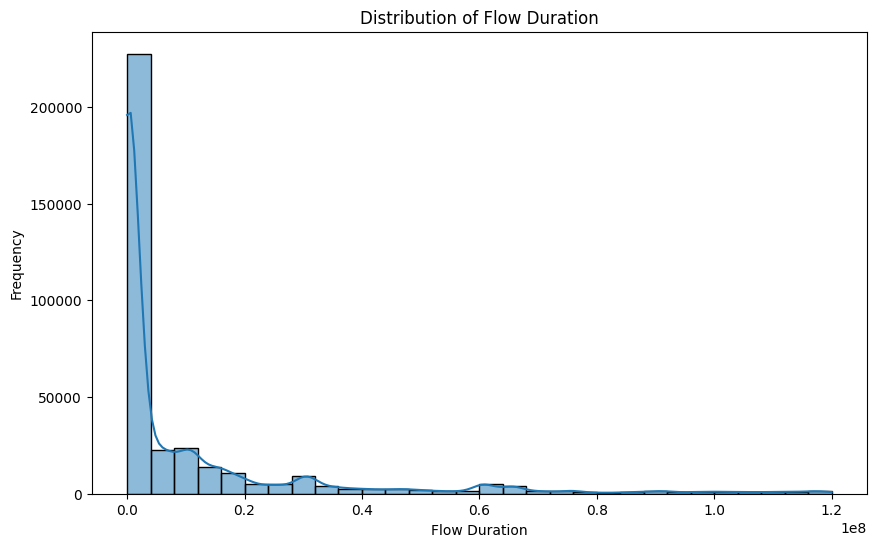

In [11]:
# Histogram for a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['Flow Duration'], bins=30, kde=True)
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

A count plot shows the frequency of each category in a categorical variable. This count plot gives us an overview of the distribution of different protocols in the dataset. It helps identify the most common protocols and their relative frequencies.

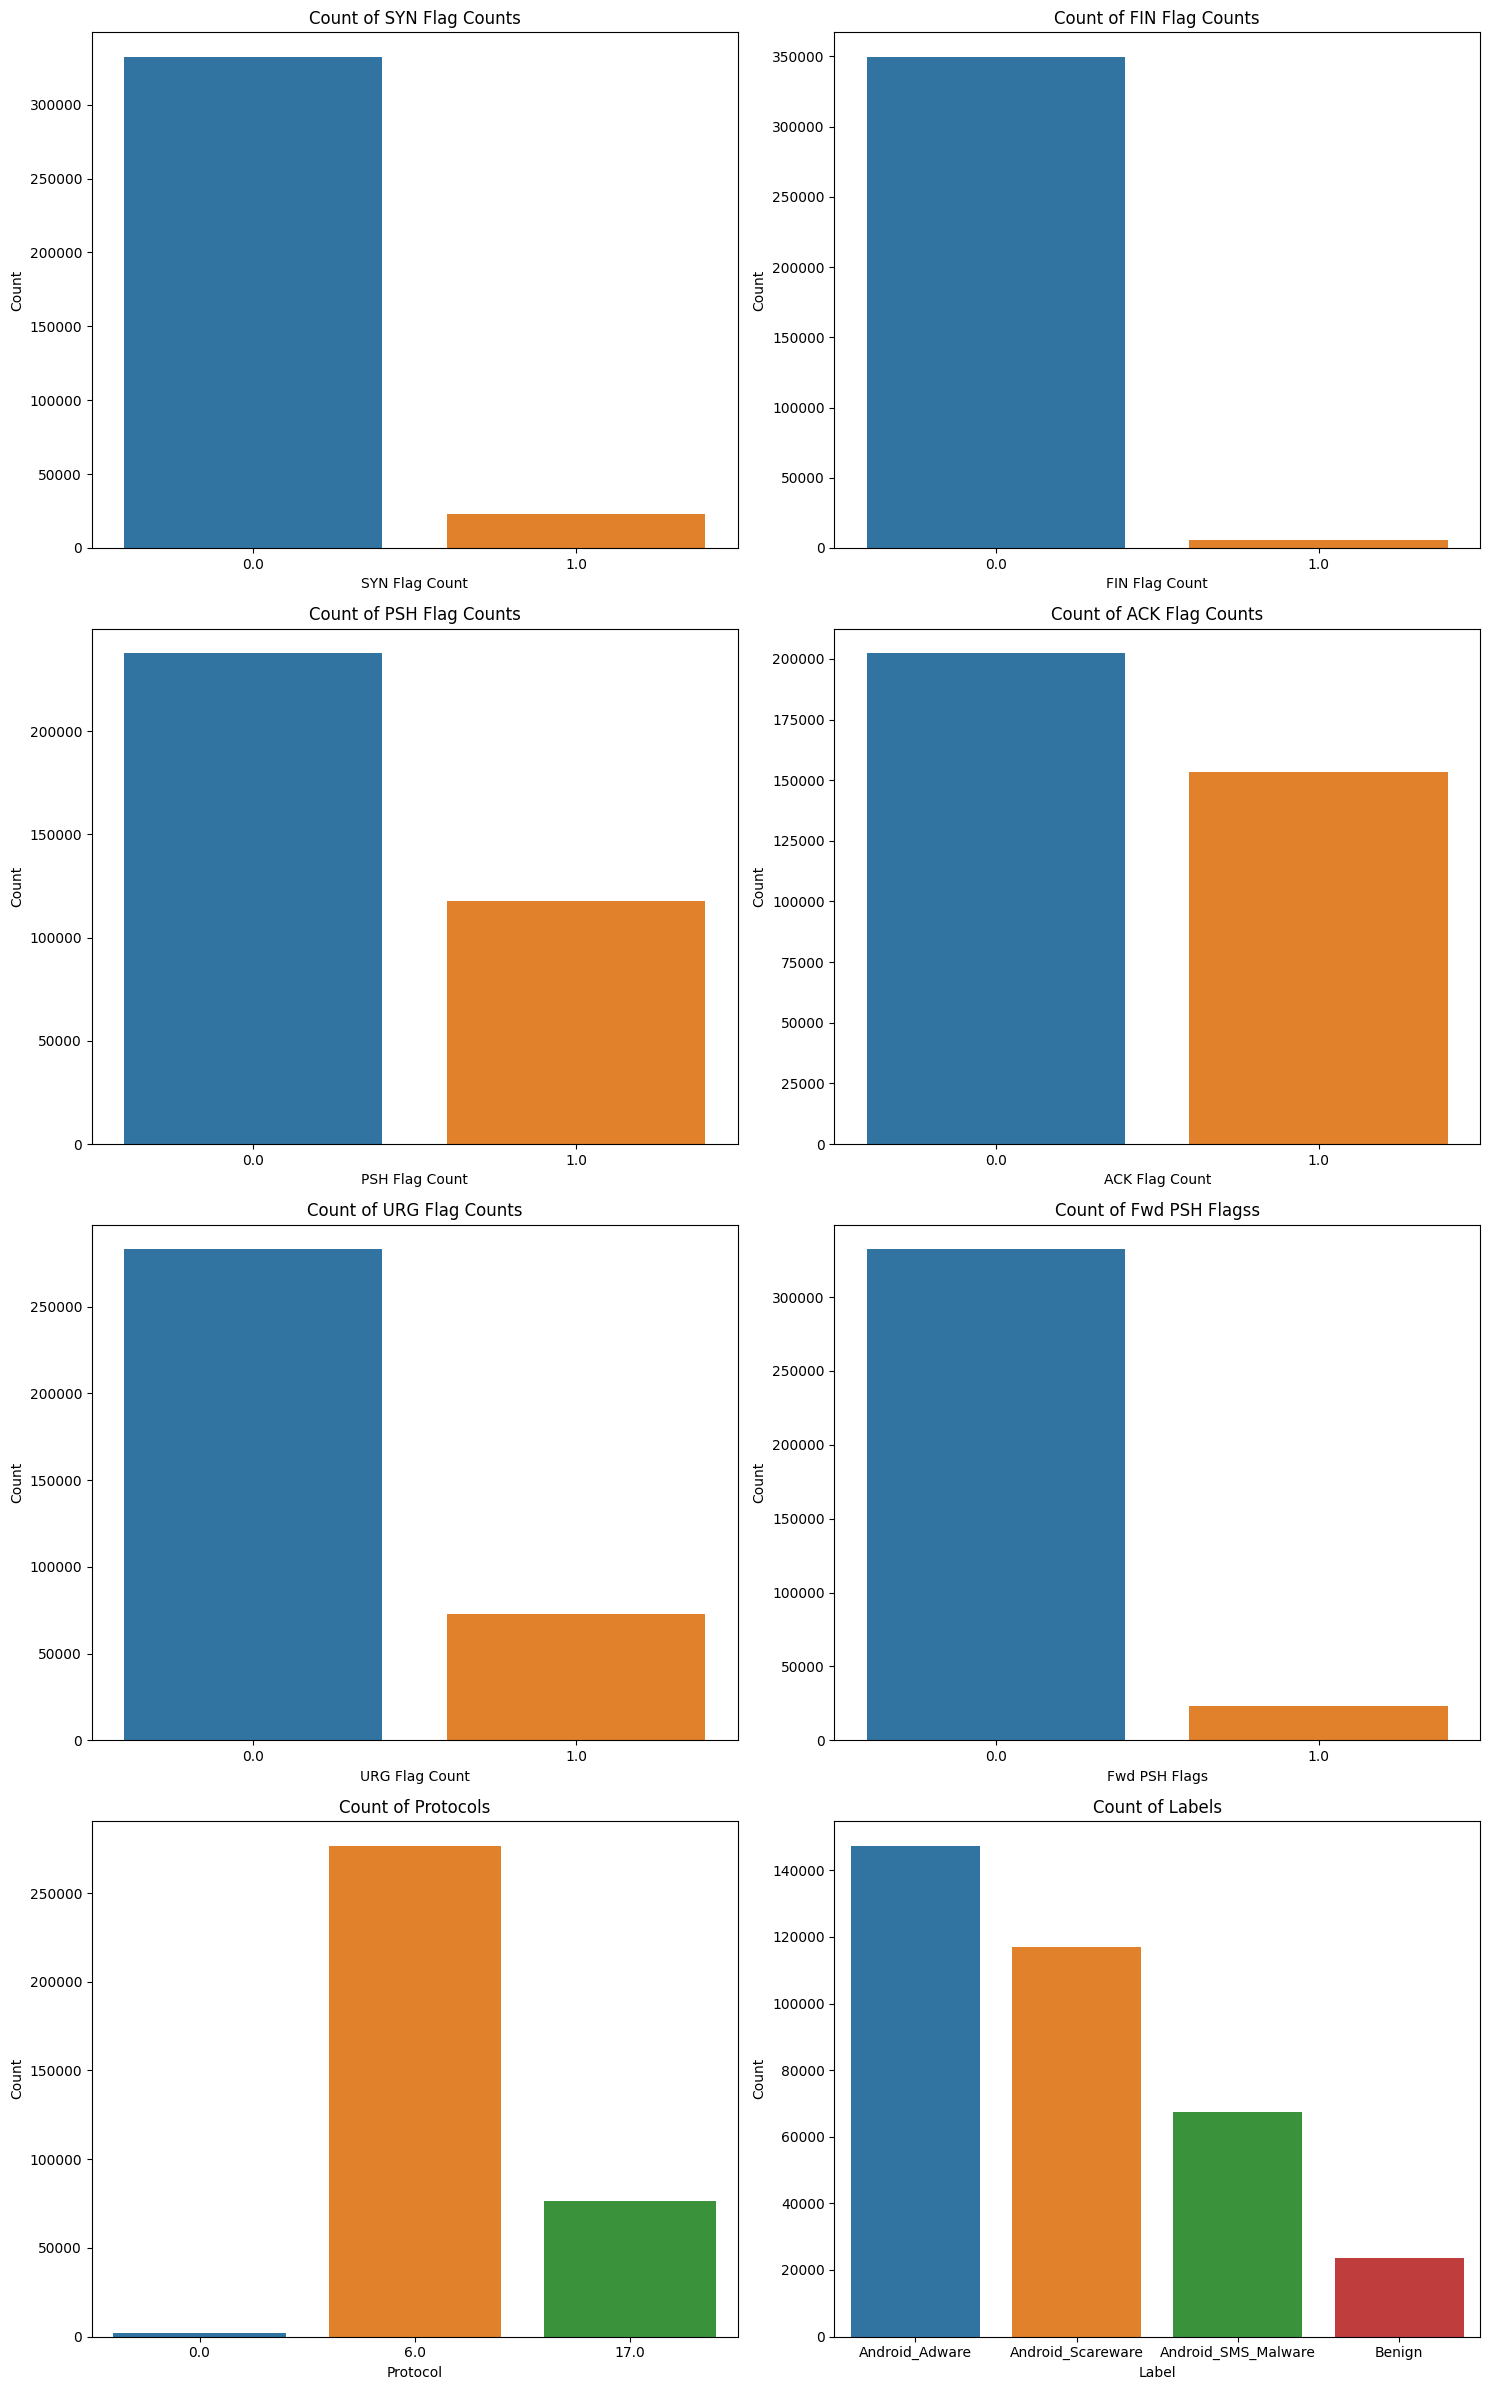

In [16]:
# Count plot for a categorical column
columns = [
    "SYN Flag Count",
    "FIN Flag Count",
    "PSH Flag Count",
    "ACK Flag Count",
    "URG Flag Count",
    "Fwd PSH Flags",
    "Protocol",
    "Label"
]

# Calculate the number of rows and columns for the grid
num_rows = (len(columns) + 1) // 2
num_cols = 2

# Create plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, c in enumerate(columns):
    sns.countplot(x=c, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {c}s')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation Matrix
Understanding correlations assists in identifying potential patterns and dependencies within the data.

C:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


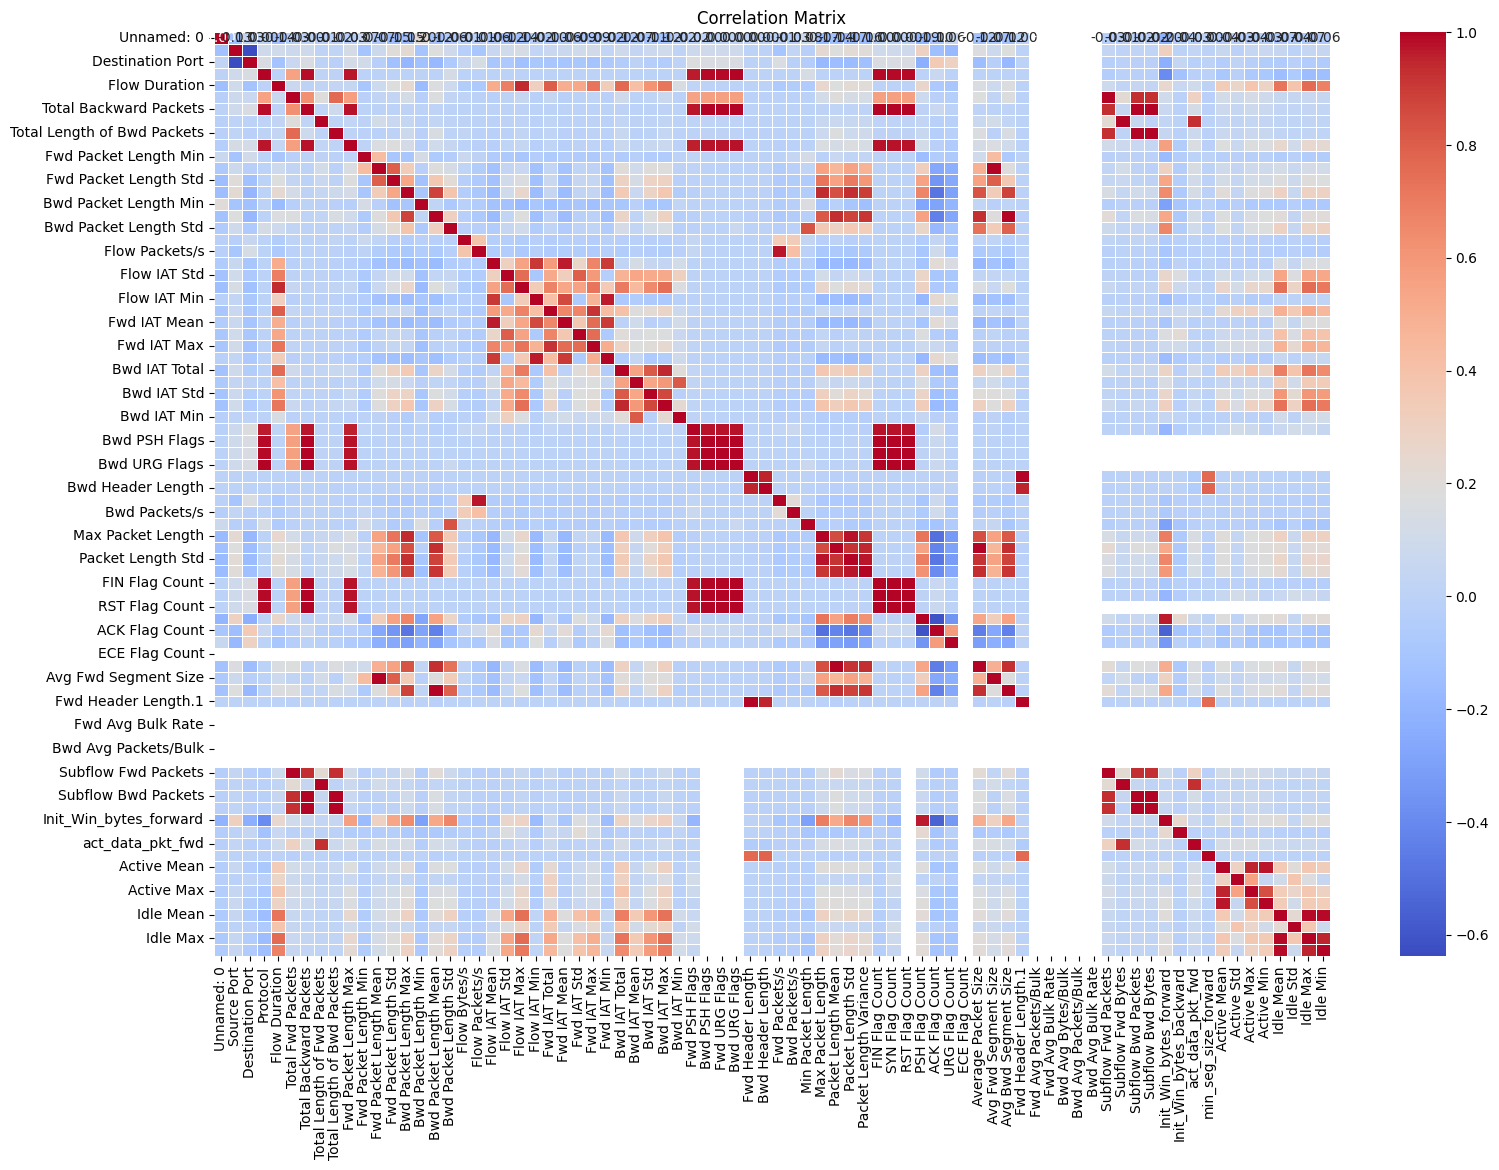

In [29]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include="number")

# Calculate and visualize the correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()